In [40]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

1. 데이터 확인

In [122]:
#MNIST dataset

train_dset = datasets.MNIST('../data', train=True, download=True,transform=transforms.ToTensor())
test_dset = datasets.MNIST('../data', train=False,transform=transforms.ToTensor(), download=True)

print('number of training data: ', len(train_dset))
print('number of test data ', len(test_dset))

number of training data:  60000
number of test data  10000


Image
Shape of image	:  torch.Size([1, 28, 28])
10'th row of this image	: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7804, 0.9882,
        0.9882, 0.6824, 0.0667, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.6980, 0.9882, 0.9882, 0.4510, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])
Label
label:  9


<function matplotlib.pyplot.show(*args, **kw)>

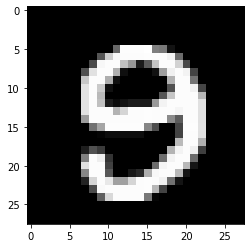

In [123]:
#데이터 확인

"""

TODO: train_dset[*] 의 숫자값을 바꾸어 데이터를 다른 걸 출력해보자.

"""

import random
def rand_generator():
    rand_num = random.randint(0, 9999)
    return rand_num

random_image = rand_generator()
image, label = train_dset[random_image]

print('Image')
print('=========================================')
print('Shape of image\t: ', image.shape)
print('10\'th row of this image\t:', image[0][9])

print('Label')
print('=========================================')
print('label: ', label)

from matplotlib import pyplot as plt
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.show

2. Training and Test

In [130]:
"""
TODO: batch_size 를 바꾸어보자
"""


train_loader = torch.utils.data.DataLoader(train_dset, batch_size = 512, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dset, batch_size = 512, shuffle=False)

In [125]:
device

device(type='cuda')

In [131]:
#Training
def train(model, train_loader, optimizer, i_epoch, device):
    model.train()
    for i, (image, target) in enumerate(train_loader):
        image = image.to(device)
        target = target.to(device)
        output = model(image)
        loss = F.cross_entropy(output, target)

        model.zero_grad()
        loss.backward()
        optimizer.step()



        #러닝 커브 그리기
        loss_value.append(loss.detach())

        #100번쨰 마다 loss 출력
        if i%100==0:
            print("epoch: {}, iteration: {}, loss: {}".format(i_epoch, i, loss.item()))

In [132]:
#Test
def test(model, test_loader, i_epoch, device):
    model.eval()
    accurate = 0
    test_loss = 0

    with torch.no_grad():
        for i, (image, target) in enumerate(test_loader):
            image = image.to(device)
            target = target.to(device)
            output = model(image)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            prediction = torch.argmax(output, dim=1)
            accurate += prediction.eq(target.view_as(prediction)).sum().item()


    accuracy = accurate / len(test_loader.dataset)
    #러닝커브 그리기
    accuracy_value.append(accuracy)
    print("epoch: {}, accuracy: {}".format(i_epoch, accuracy))


3. Model

In [134]:
"""
TODO: 모델 Customization! 레이어 개수나 레이어 차원, 활성화 함수를 바꾸어보자.

데이터의 형태를 주의하면서 바꾸어 볼 것~

"""

class net(nn.Module):
    def __init__(self, input_size, output_size):
        
        self.input_size = input_size
        self.output_size = output_size
        super(net, self).__init__()


        self.fc = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, output_size),
           )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.fc(x)

4. Evaluation

In [135]:
loss_value = []
accuracy_value = []
model = net(28*28, 10).to(device)

"""

TODO: 학습률을 바꾸어보고, Optimizer 을 바꾸어보자 (선택)

"""
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [136]:
"""
TODO: 학습횟수를 자유자재로 바꾸어보자.
"""

for i_epoch in range(20):
    train(model, train_loader, optimizer, i_epoch, device)
    test(model, test_loader, i_epoch, device)
    torch.save(model.state_dict(), "mnist_test.pt")

"""
 print('=========================================')
    print("Model's state_dict for epoch :", i_epoch)
    for param_tensor in model.state_dict():
     print(param_tensor, "\t", model.state_dict()[param_tensor].size())

    print("Optimizer's state_dict:")
     for var_name in optimizer.state_dict():
      print(var_name, "\t", optimizer.state_dict()[var_name])

    print('=========================================')
"""

epoch: 0, iteration: 0, loss: 2.303114652633667
epoch: 0, iteration: 100, loss: 1.0456619262695312
epoch: 0, accuracy: 0.8105
epoch: 1, iteration: 0, loss: 0.7350260019302368
epoch: 1, iteration: 100, loss: 0.42344823479652405
epoch: 1, accuracy: 0.8859
epoch: 2, iteration: 0, loss: 0.437149316072464
epoch: 2, iteration: 100, loss: 0.3459475338459015
epoch: 2, accuracy: 0.9019
epoch: 3, iteration: 0, loss: 0.3166786730289459
epoch: 3, iteration: 100, loss: 0.3602476418018341
epoch: 3, accuracy: 0.912
epoch: 4, iteration: 0, loss: 0.33249473571777344
epoch: 4, iteration: 100, loss: 0.32948359847068787
epoch: 4, accuracy: 0.9208
epoch: 5, iteration: 0, loss: 0.28984391689300537
epoch: 5, iteration: 100, loss: 0.259171724319458
epoch: 5, accuracy: 0.9288
epoch: 6, iteration: 0, loss: 0.27778083086013794
epoch: 6, iteration: 100, loss: 0.24240835011005402
epoch: 6, accuracy: 0.9332
epoch: 7, iteration: 0, loss: 0.3010862469673157
epoch: 7, iteration: 100, loss: 0.18498879671096802
epoch: 7

'\n print(\'=========================================\')\n    print("Model\'s state_dict for epoch :", i_epoch)\n    for param_tensor in model.state_dict():\n     print(param_tensor, "\t", model.state_dict()[param_tensor].size())\n\n    print("Optimizer\'s state_dict:")\n     for var_name in optimizer.state_dict():\n      print(var_name, "\t", optimizer.state_dict()[var_name])\n\n    print(\'=========================================\')\n'

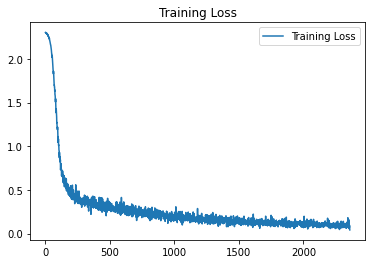

In [139]:
#그래프 확인
loss_value2 = [x.to("cpu").numpy() for x in loss_value]
plt.plot(loss_value2, label='Training Loss')

plt.title('Training Loss')
plt.legend()

Text(0.5, 0, 'Epoch')

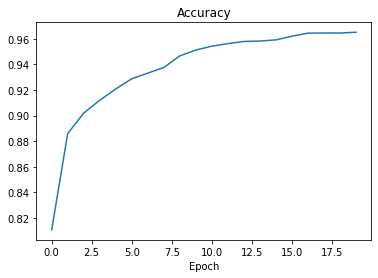

In [140]:
plt.plot(accuracy_value, label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')